# Queueing theory - M/M/1 example

### 1. Imports

In [11]:
import openqtsim

### 2. Prepare inputs

In [12]:
# Basic input
Lambda = 8
Mu = 9

#### Define the queue object input

In [13]:
# Create Arrival and Service processes and specify the number of servers
A = openqtsim.ArrivalProcess("M", arr_rate=Lambda)
S = openqtsim.ServiceProcess("M", srv_rate=Mu)
c = 1

#### Create the queue object and use it to create a simulating object

In [14]:
# Create the queue object and use it to create a simulating object
q = openqtsim.Queue(A, S, c)
q.kendall_notation

'M/M/1/inf/inf/FIFO'

### 3. Run the simulation

In [15]:
%%time
print('Start simulation of "{}" queue'.format(q.kendall_notation))
print('')

sim = openqtsim.Simulation(q)
sim.run(10000) 

Start simulation of "M/M/1/inf/inf/FIFO" queue

Wall time: 1.35 s


In [16]:
sim.get_stats()
print('Input IAT: {:.4f}'.format(1/Lambda))
print('Input ST: {:.4f}'.format(1/Mu))

# check at: https://www.supositorio.com/rcalc/rcalclite.htm

Waiting time over service time: 7.9349

Rho: server utilisation: 0.8818
P_0: probability nobody in the system: 0.1182

L_s: average nr of customers in the system: 8.466476676166192
L_q: average nr of customers in the queue: 7.524823758812059
W_s: the long term average time spent in the system: 0.9891
W_q: the long term average time spent in the queue: 0.8784

IAT: average inter arrival time: 0.1255
ST: average service time: 0.1107

Input IAT: 0.1250
Input ST: 0.1111


**Analytical solution: M_M_1_inf_inf_FIFO**

    arrival rate: 8.0000 per hour
    service rate: 9.0000 per hour
    rho: 0.8889

    P_0: probability that there are 0 customers in the system = 0.1111
    P_1: probability of 1 customers in the system = 0.0988
    P_10: probability of 10 customers in the system = 0.0342

    no_q: probability that there is nobody in the queue (P_0+P_1) = 0.2099
    util_sys: system utilisation rate  (P_(n>=1)) = 0.8889
    util_ser: server utilisation rate (P_(n>=2)) = 0.7901

    L_s: the long term average number of customers present in the system = 8.0000
    L_q: the long term average number of customers present in the queue = 7.1111
    W_s: the long term average time spent in the system = 1.0000 hour (= 60.0 minutes)
    W_q: the long term average waiting time in the queue = 0.8889 hour (= 53.3 minutes)

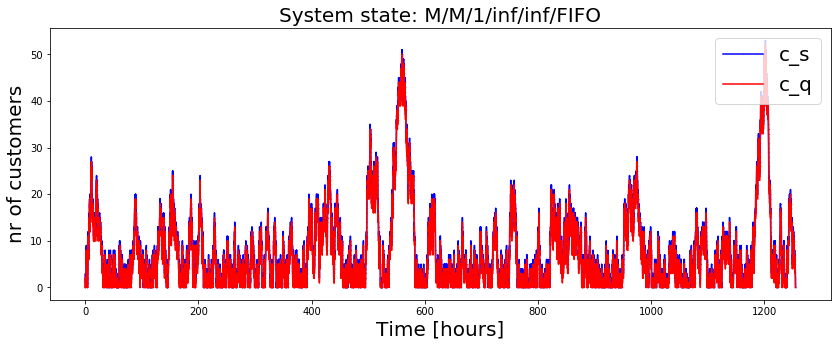

In [17]:
sim.plot_system_state()

In [18]:
df, df_sys = sim.return_log()

In [19]:
df.head(10)

,c_id,IAT,ST,AT,TSB,TSE,TCSS,TCWQ,ITS,s_id
0,1,0.129916,0.148581,0.129916,0.129916,0.278498,0.148582,0.000000,0.129916,1
1,2,0.087875,0.079420,0.217791,0.278498,0.357918,0.140126,0.060707,0.000000,1
2,3,0.023651,0.051182,0.241443,0.357918,0.409099,0.167657,0.116475,0.000000,1
3,4,0.047430,0.188987,0.288873,0.409099,0.598087,0.309213,0.120226,0.000000,1
4,5,0.257472,0.089461,0.546345,0.598087,0.687547,0.141202,0.051741,0.000000,1
5,6,0.023456,0.105575,0.569802,0.687547,0.793122,0.223320,0.117746,0.000000,1
6,7,0.044230,0.444686,0.614031,0.793122,1.237808,0.623777,0.179091,0.000000,1
7,8,0.194465,0.083733,0.808496,1.237808,1.321541,0.513044,0.429312,0.000000,1
8,9,0.304999,0.482529,1.113496,1.321541,1.804070,0.690574,0.208045,0.000000,1
9,10,0.037928,0.016875,1.151424,1.804070,1.820945,0.669521,0.652646,0.000000,1


In [20]:
df_sys.head(10)

,t,c_s,c_q
0,0.000000,0,0
1,0.129916,1,0
2,0.217791,2,1
4,0.241443,3,2
3,0.278498,2,1
6,0.288873,3,2
5,0.357918,2,1
7,0.409099,1,0
8,0.546345,2,1
10,0.569802,3,2


## Sandbox